# Exercise 10: Classification (Evaluation metrics)

## 1- Confusion Matrix

A confusion matrix is a powerful tool used in classification problems to evaluate the performance of a predictive model. It provides a comprehensive view of the model's predictions by comparing the actual values with the predicted values. In the case of binary classification, the confusion matrix is typically a 2x2 table that contains four key values:

True Positive (TP):
These are the instances where the model correctly predicts the positive class. For example, if a model is designed to detect spam emails, a TP would be an email that is correctly classified as spam.

True Negative (TN):
These are the cases where the model correctly identifies the negative class. Using the same example, a TN would be an email that is correctly classified as not spam.

False Positive (FP):
Often referred to as a "false alarm," this occurs when the model incorrectly predicts the positive class. In our example, a FP would be a legitimate email that is mistakenly classified as spam.

False Negative (FN):
This happens when the model fails to identify a positive instance, incorrectly predicting it as negative. For instance, a FN would be a spam email that the model incorrectly classifies as not spam.

<div style="text-align: center;">
    <img src="img/Confusionn.jpg" width="700"/>

## 2- Accuracy
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
---

## 3- Precision
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
---

## 4- Recall (Sensitivity, TPR)
$$
\text{Recall} = \frac{TP}{TP + FN}
$$
---

## 5- F1-Score
$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$
---

## 6- Specificity (TNR)
$$
\text{Specificity} = \frac{TN}{TN + FP}
$$
---

## 7- NPV (Negative Predictive Value)
$$
\text{NPV} = \frac{TN}{TN + FN}
$$



## 8- Binary Classification using Logistic Regression

Confusion Matrix:
[[119  10]
 [  6 115]]


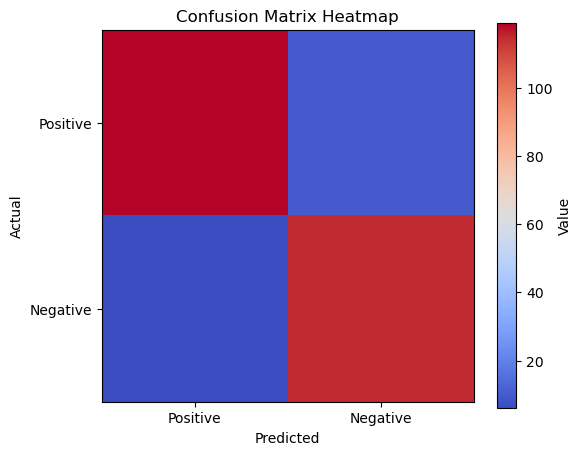


Evaluation Metrics:
Accuracy: 0.94
Precision: 0.92
Recall (Sensitivity, TPR): 0.95
F1-Score: 0.94
Specificity (TNR): 0.92
NPV (Negative Predictive Value): 0.95


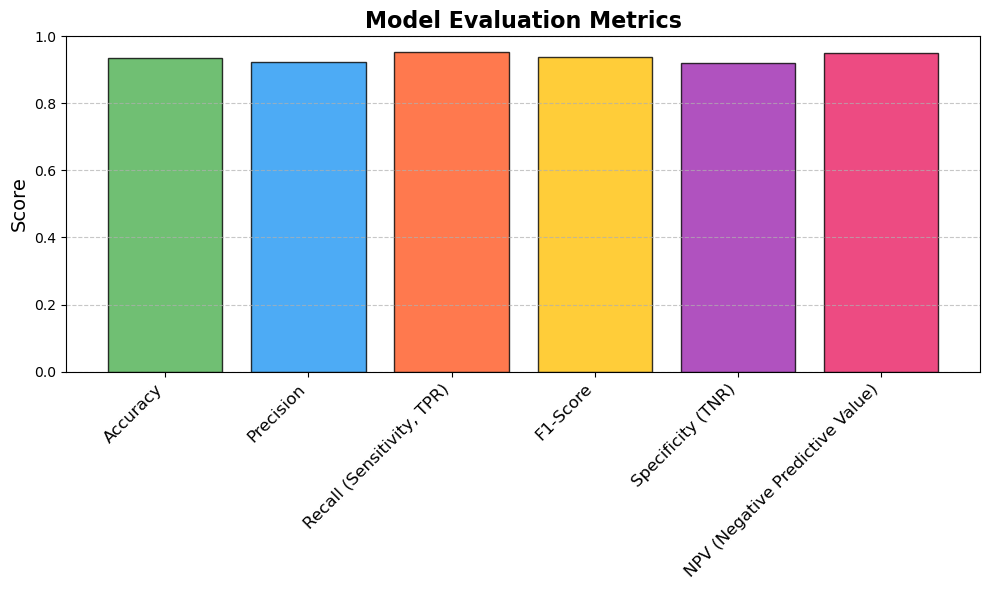

In [46]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Generate synthetic binary classification data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

# Split data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 1: Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Extract values for computation
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[1, 1]

# Step 2: Plot the heatmap of confusion matrix
reordered_matrix = np.array([
    [TP, FP],  # [TP, FP]
    [FN, TN]   # [FN, TN]
])

plt.figure(figsize=(6, 5))
plt.imshow(reordered_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Confusion Matrix Heatmap')
plt.colorbar(label='Value')
plt.xticks([0, 1], ['Positive', 'Negative'])  # Predicted classes
plt.yticks([0, 1], ['Positive', 'Negative'])  # Actual classes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Step 3: Compute evaluation metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
specificity = TN / (TN + FP) if TN + FP > 0 else 0
npv = TN / (TN + FN) if TN + FN > 0 else 0

# Step 4: Print metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall (Sensitivity, TPR)": recall,
    "F1-Score": f1_score,
    "Specificity (TNR)": specificity,
    "NPV (Negative Predictive Value)": npv
}

print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

# Step 5: Enhanced plot for metrics
plt.figure(figsize=(10, 6))
colors = ['#4CAF50', '#2196F3', '#FF5722', '#FFC107', '#9C27B0', '#E91E63']
plt.bar(metrics.keys(), metrics.values(), color=colors, edgecolor='black', alpha=0.8)
plt.title('Model Evaluation Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 9- Binary Classification using k-Nearest Neighbors (k-NN)

Confusion Matrix:
[[110  28]
 [ 16  96]]


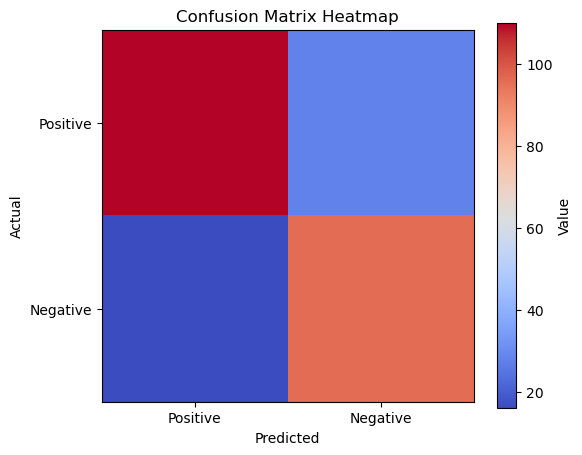


Evaluation Metrics:
Accuracy: 0.82
Precision: 0.80
Recall (Sensitivity, TPR): 0.87
F1-Score: 0.83
Specificity (TNR): 0.77
NPV (Negative Predictive Value): 0.86


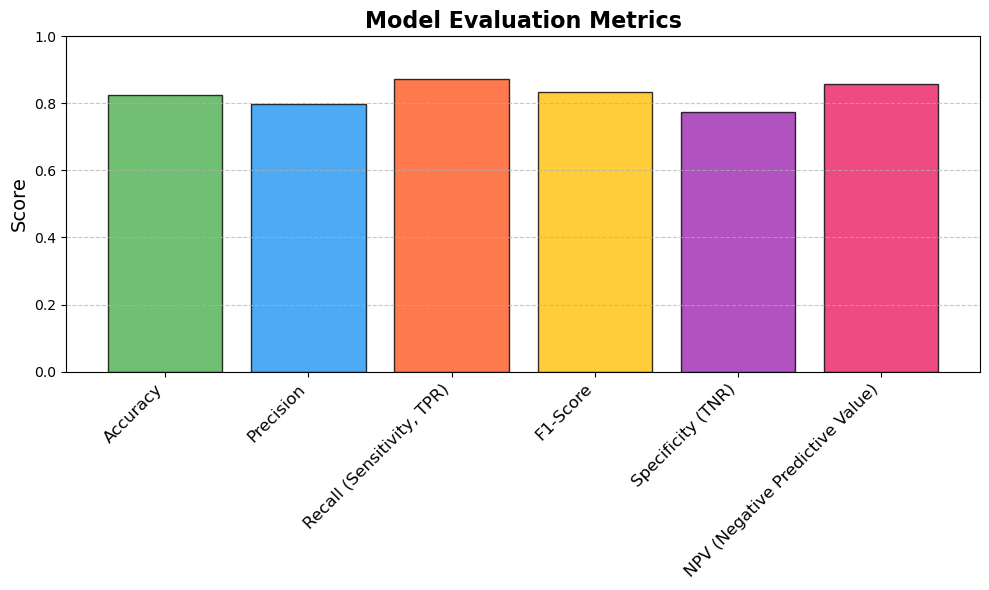

In [48]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Generate synthetic binary classification data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

# Split data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Initialize and train k-Nearest Neighbors model
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 1: Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Extract values for computation
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[1, 1]

# Step 2: Plot the heatmap of confusion matrix
reordered_matrix = np.array([
    [TP, FP],  # [TP, FP]
    [FN, TN]   # [FN, TN]
])

plt.figure(figsize=(6, 5))
plt.imshow(reordered_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Confusion Matrix Heatmap')
plt.colorbar(label='Value')
plt.xticks([0, 1], ['Positive', 'Negative'])  # Predicted classes
plt.yticks([0, 1], ['Positive', 'Negative'])  # Actual classes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Step 3: Compute evaluation metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
specificity = TN / (TN + FP) if TN + FP > 0 else 0
npv = TN / (TN + FN) if TN + FN > 0 else 0

# Step 4: Print metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall (Sensitivity, TPR)": recall,
    "F1-Score": f1_score,
    "Specificity (TNR)": specificity,
    "NPV (Negative Predictive Value)": npv
}

print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

# Step 5: Enhanced plot for metrics
plt.figure(figsize=(10, 6))
colors = ['#4CAF50', '#2196F3', '#FF5722', '#FFC107', '#9C27B0', '#E91E63']
plt.bar(metrics.keys(), metrics.values(), color=colors, edgecolor='black', alpha=0.8)
plt.title('Model Evaluation Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 10- Binary Classification using decision tree

Confusion Matrix:
[[114   7]
 [  6 123]]


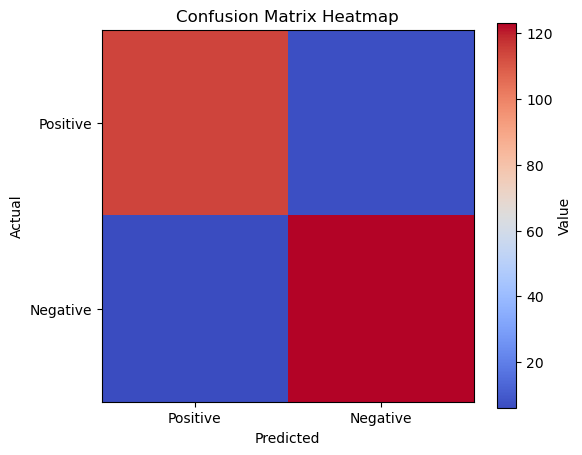


Evaluation Metrics:
Accuracy: 0.95
Precision: 0.94
Recall (Sensitivity, TPR): 0.95
F1-Score: 0.95
Specificity (TNR): 0.95
NPV (Negative Predictive Value): 0.95


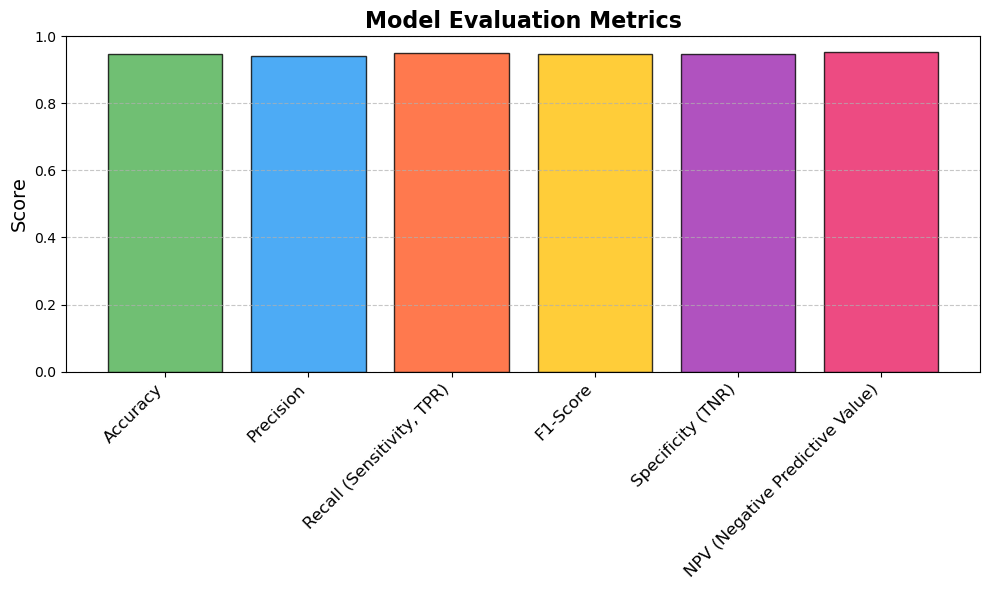

In [52]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Generate synthetic binary classification data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

# Split data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Initialize and train Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 1: Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Extract values for computation
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[1, 1]

# Step 2: Plot the heatmap of confusion matrix
reordered_matrix = np.array([
    [TP, FP],  # [TP, FP]
    [FN, TN]   # [FN, TN]
])

plt.figure(figsize=(6, 5))
plt.imshow(reordered_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Confusion Matrix Heatmap')
plt.colorbar(label='Value')
plt.xticks([0, 1], ['Positive', 'Negative'])  # Predicted classes
plt.yticks([0, 1], ['Positive', 'Negative'])  # Actual classes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Step 3: Compute evaluation metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
specificity = TN / (TN + FP) if TN + FP > 0 else 0
npv = TN / (TN + FN) if TN + FN > 0 else 0

# Step 4: Print metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall (Sensitivity, TPR)": recall,
    "F1-Score": f1_score,
    "Specificity (TNR)": specificity,
    "NPV (Negative Predictive Value)": npv
}

print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

# Step 5: Enhanced plot for metrics
plt.figure(figsize=(10, 6))
colors = ['#4CAF50', '#2196F3', '#FF5722', '#FFC107', '#9C27B0', '#E91E63']
plt.bar(metrics.keys(), metrics.values(), color=colors, edgecolor='black', alpha=0.8)
plt.title('Model Evaluation Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 11- Binary Classification using Naive Bayes 

Confusion Matrix:
[[120   5]
 [  7 118]]


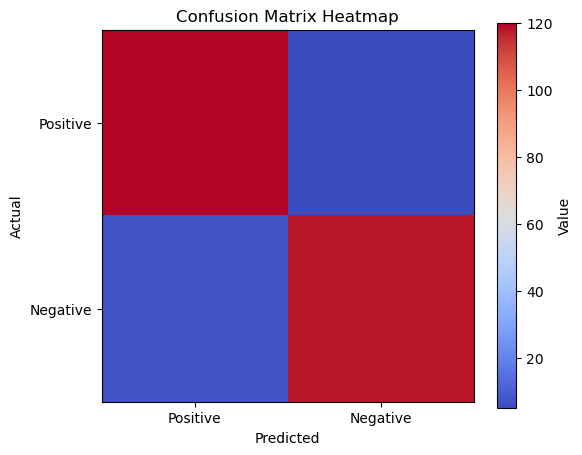


Evaluation Metrics:
Accuracy: 0.95
Precision: 0.96
Recall (Sensitivity, TPR): 0.94
F1-Score: 0.95
Specificity (TNR): 0.96
NPV (Negative Predictive Value): 0.94


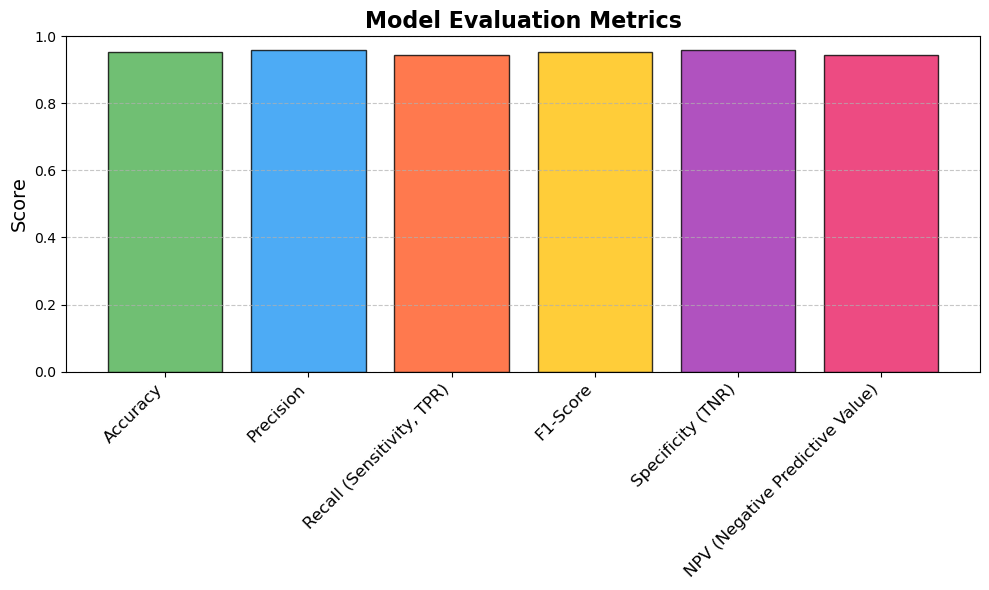

In [50]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Generate synthetic binary classification data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

# Split data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Initialize and train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 1: Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Extract values for computation
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[1, 1]

# Step 2: Plot the heatmap of confusion matrix
reordered_matrix = np.array([
    [TP, FP],  # [TP, FP]
    [FN, TN]   # [FN, TN]
])

plt.figure(figsize=(6, 5))
plt.imshow(reordered_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Confusion Matrix Heatmap')
plt.colorbar(label='Value')
plt.xticks([0, 1], ['Positive', 'Negative'])  # Predicted classes
plt.yticks([0, 1], ['Positive', 'Negative'])  # Actual classes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Step 3: Compute evaluation metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
specificity = TN / (TN + FP) if TN + FP > 0 else 0
npv = TN / (TN + FN) if TN + FN > 0 else 0

# Step 4: Print metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall (Sensitivity, TPR)": recall,
    "F1-Score": f1_score,
    "Specificity (TNR)": specificity,
    "NPV (Negative Predictive Value)": npv
}

print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

# Step 5: Enhanced plot for metrics
plt.figure(figsize=(10, 6))
colors = ['#4CAF50', '#2196F3', '#FF5722', '#FFC107', '#9C27B0', '#E91E63']
plt.bar(metrics.keys(), metrics.values(), color=colors, edgecolor='black', alpha=0.8)
plt.title('Model Evaluation Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 12- Binary Classification using using SVM

Confusion Matrix:
[[105  14]
 [ 12 119]]


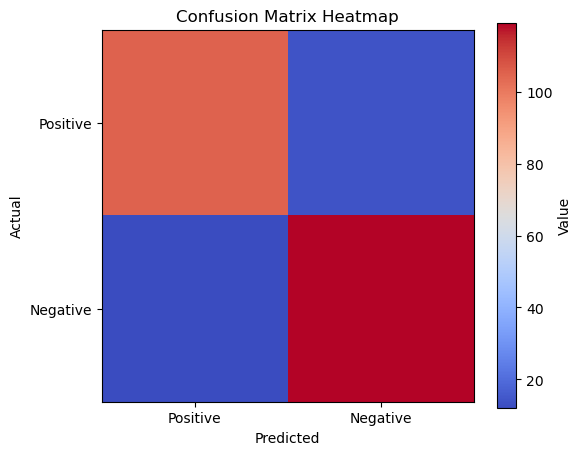


Evaluation Metrics:
Accuracy: 0.90
Precision: 0.88
Recall (Sensitivity, TPR): 0.90
F1-Score: 0.89
Specificity (TNR): 0.89
NPV (Negative Predictive Value): 0.91


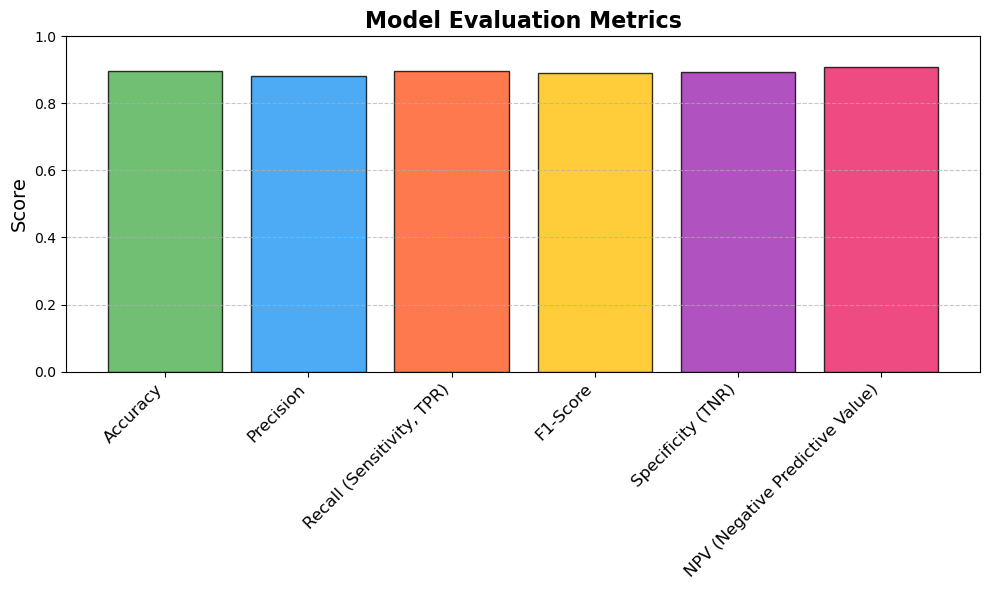

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Generate synthetic binary classification data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

# Split data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Initialize and train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 1: Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Extract values for computation
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[1, 1]

# Step 2: Plot the heatmap of confusion matrix
reordered_matrix = np.array([
    [TP, FP],  # [TP, FP]
    [FN, TN]   # [FN, TN]
])

plt.figure(figsize=(6, 5))
plt.imshow(reordered_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Confusion Matrix Heatmap')
plt.colorbar(label='Value')
plt.xticks([0, 1], ['Positive', 'Negative'])  # Predicted classes
plt.yticks([0, 1], ['Positive', 'Negative'])  # Actual classes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Step 3: Compute evaluation metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
specificity = TN / (TN + FP) if TN + FP > 0 else 0
npv = TN / (TN + FN) if TN + FN > 0 else 0

# Step 4: Print metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall (Sensitivity, TPR)": recall,
    "F1-Score": f1_score,
    "Specificity (TNR)": specificity,
    "NPV (Negative Predictive Value)": npv
}

print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

# Step 5: Enhanced plot for metrics
plt.figure(figsize=(10, 6))
colors = ['#4CAF50', '#2196F3', '#FF5722', '#FFC107', '#9C27B0', '#E91E63']
plt.bar(metrics.keys(), metrics.values(), color=colors, edgecolor='black', alpha=0.8)
plt.title('Model Evaluation Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()